<a href="https://colab.research.google.com/github/FaustoFLES/Programacion-Analitica/blob/main/Pr%C3%A1ctica_24_Avances_del_proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#importar base de datos
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Escuela/Maestria/3er Semestre/Programacion Analitica/Proyecto/Dataset/New Dataset.csv', delimiter=';')
display(df.head())

,Year,Mode,SCTGGroup,OrigCMA,OrigProv,OrigCtry,DestCMA,DestProv,DestCtry,Shipments,Weight,Revenue,Distance,TonneKm,Value
0,2011,TF,OTHMF,559,ON,CA,825,AB,CA,59,"28,284.20","58,508.90","220,471.00","105,783.50","560,727.50"
1,2011,TF,OTHMF,559,ON,CA,835,AB,CA,127,"138,919.10","100,204.10","478,640.00","523,088.60","1,634,366.40"
2,2011,TF,OTHMF,559,ON,CA,933,BC,CA,42,"22,850.60","52,947.40","196,805.00","107,261.20","1,258,757.70"
3,2011,TF,OTHMF,600,MB,CA,421,QC,CA,49,"612,882.10","292,874.20","185,448.00","2,374,926.80","8,193,369.40"
4,2011,TF,OTHMF,600,MB,CA,537,ON,CA,17,"15,362.50","13,966.20","36,060.00","32,817.00","299,427.20"


In [15]:
# Identify numerical columns that need cleaning
numerical_cols = ['Shipments', 'Weight', 'Revenue', 'Distance', 'TonneKm', 'Value']

# Clean numerical columns by swapping comma and period and converting to numeric
for col in numerical_cols:
    # Check if the column is of object type (string) before cleaning
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce') # Use errors='coerce' to turn unparseable values into NaN

# Check for missing values after cleaning
missing_values_after_cleaning = df.isnull().sum()
print("Missing values after cleaning:")
print(missing_values_after_cleaning)

Missing values after cleaning:
Year             0
Mode             0
SCTGGroup        0
OrigCMA          0
OrigProv         0
OrigCtry         0
DestCMA          0
DestProv         0
DestCtry         0
Shipments     1580
Weight       33630
Revenue      22021
Distance     22216
TonneKm      35618
Value        37202
dtype: int64


In [17]:
# Fill missing values with the mean of each column
for col in numerical_cols:
    if df[col].isnull().any():
        mean_value = df[col].mean()
        df[col] = df[col].fillna(mean_value) # Modified to avoid the warning

# Verify that there are no more missing values
missing_values_after_imputation = df.isnull().sum()
print("\nMissing values after imputation:")
print(missing_values_after_imputation)

# Display the data with filled missing values
display(df.head())


Missing values after imputation:
Year         0
Mode         0
SCTGGroup    0
OrigCMA      0
OrigProv     0
OrigCtry     0
DestCMA      0
DestProv     0
DestCtry     0
Shipments    0
Weight       0
Revenue      0
Distance     0
TonneKm      0
Value        0
dtype: int64


,Year,Mode,SCTGGroup,OrigCMA,OrigProv,OrigCtry,DestCMA,DestProv,DestCtry,Shipments,Weight,Revenue,Distance,TonneKm,Value
0,2011,TF,OTHMF,559,ON,CA,825,AB,CA,59.0,28.2842,58.5089,220.471,105.783500,560.727500
1,2011,TF,OTHMF,559,ON,CA,835,AB,CA,127.0,138.9191,100.2041,478.640,523.088600,612.797768
2,2011,TF,OTHMF,559,ON,CA,933,BC,CA,42.0,22.8506,52.9474,196.805,107.261200,612.797768
3,2011,TF,OTHMF,600,MB,CA,421,QC,CA,49.0,612.8821,292.8742,185.448,556.056334,612.797768
4,2011,TF,OTHMF,600,MB,CA,537,ON,CA,17.0,15.3625,13.9662,36.060,32.817000,299.427200


In [29]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler_zscore = StandardScaler()

# Reshape the 'Revenue' column
revenue_reshaped_zscore = df['Revenue'].values.reshape(-1, 1)

# Apply Z-score normalization
df['Revenue_zscore'] = scaler_zscore.fit_transform(revenue_reshaped_zscore)

# Display the first few rows with the new Z-score normalized column
display(df.head())

,Year,Mode,SCTGGroup,OrigCMA,OrigProv,OrigCtry,DestCMA,DestProv,DestCtry,Shipments,Weight,Revenue,Distance,TonneKm,Value,Revenue_normalized,Revenue_logtransformed,Revenue_boxcox,Revenue_zscore
0,2011,TF,OTHMF,559,ON,CA,825,AB,CA,59.0,28.2842,58.5089,220.471,105.783500,560.727500,0.005752,4.086126,6.013846,-0.443877
1,2011,TF,OTHMF,559,ON,CA,835,AB,CA,127.0,138.9191,100.2041,478.640,523.088600,612.797768,0.009922,4.617139,7.168297,-0.408161
2,2011,TF,OTHMF,559,ON,CA,933,BC,CA,42.0,22.8506,52.9474,196.805,107.261200,612.797768,0.005196,3.988009,5.812248,-0.448641
3,2011,TF,OTHMF,600,MB,CA,421,QC,CA,49.0,612.8821,292.8742,185.448,556.056334,612.797768,0.029193,5.683152,9.843657,-0.243119
4,2011,TF,OTHMF,600,MB,CA,537,ON,CA,17.0,15.3625,13.9662,36.060,32.817000,299.427200,0.001297,2.705794,3.477817,-0.482033


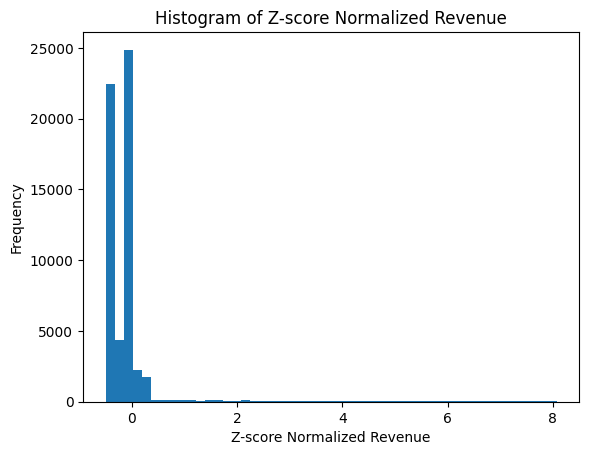

In [30]:
import matplotlib.pyplot as plt

# Plot a histogram of the Z-score normalized 'Revenue'
plt.hist(df['Revenue_zscore'], bins=50)
plt.xlabel('Z-score Normalized Revenue')
plt.ylabel('Frequency')
plt.title('Histogram of Z-score Normalized Revenue')
plt.show()

In [27]:
from scipy.stats import boxcox

# Apply Box-Cox transformation to 'Revenue'.
# The boxcox function requires positive input, so we'll add a small constant if there are zeros.
# The function returns the transformed data and the lambda parameter used for the transformation.
df['Revenue_boxcox'], lambda_boxcox = boxcox(df['Revenue'] + 1) # Adding 1 to handle zero values

print(f"Lambda parameter for Box-Cox transformation: {lambda_boxcox}")

# Display the first few rows with the new Box-Cox transformed column
display(df.head())

Lambda parameter for Box-Cox transformation: 0.17837413885586836


,Year,Mode,SCTGGroup,OrigCMA,OrigProv,OrigCtry,DestCMA,DestProv,DestCtry,Shipments,Weight,Revenue,Distance,TonneKm,Value,Revenue_normalized,Revenue_logtransformed,Revenue_boxcox
0,2011,TF,OTHMF,559,ON,CA,825,AB,CA,59.0,28.2842,58.5089,220.471,105.783500,560.727500,0.005752,4.086126,6.013846
1,2011,TF,OTHMF,559,ON,CA,835,AB,CA,127.0,138.9191,100.2041,478.640,523.088600,612.797768,0.009922,4.617139,7.168297
2,2011,TF,OTHMF,559,ON,CA,933,BC,CA,42.0,22.8506,52.9474,196.805,107.261200,612.797768,0.005196,3.988009,5.812248
3,2011,TF,OTHMF,600,MB,CA,421,QC,CA,49.0,612.8821,292.8742,185.448,556.056334,612.797768,0.029193,5.683152,9.843657
4,2011,TF,OTHMF,600,MB,CA,537,ON,CA,17.0,15.3625,13.9662,36.060,32.817000,299.427200,0.001297,2.705794,3.477817


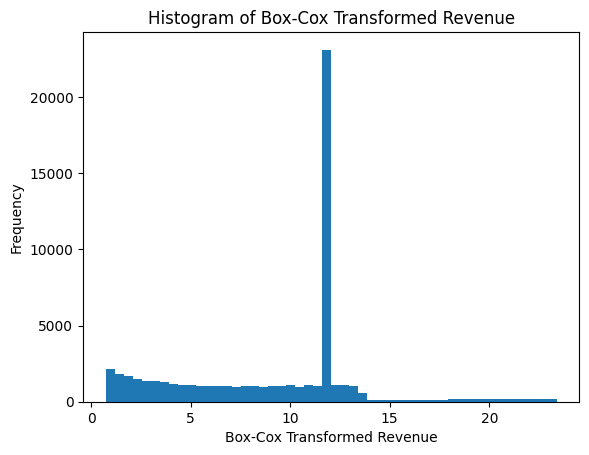

In [28]:
import matplotlib.pyplot as plt

# Plot a histogram of the Box-Cox transformed 'Revenue'
plt.hist(df['Revenue_boxcox'], bins=50)
plt.xlabel('Box-Cox Transformed Revenue')
plt.ylabel('Frequency')
plt.title('Histogram of Box-Cox Transformed Revenue')
plt.show()

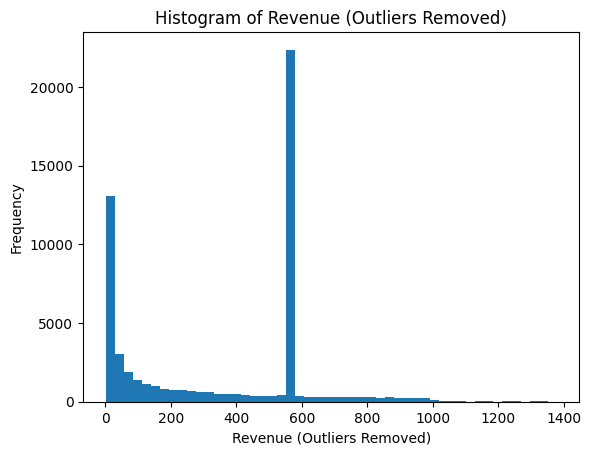

In [26]:
import matplotlib.pyplot as plt

# Plot a histogram of the 'Revenue' column after outlier removal
plt.hist(df_no_outliers['Revenue'], bins=50)
plt.xlabel('Revenue (Outliers Removed)')
plt.ylabel('Frequency')
plt.title('Histogram of Revenue (Outliers Removed)')
plt.show()

In [24]:
# Calculate Q1, Q3, and IQR for the 'Revenue' column
Q1 = df['Revenue'].quantile(0.25)
Q3 = df['Revenue'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and remove outliers
df_no_outliers = df[(df['Revenue'] >= lower_bound) & (df['Revenue'] <= upper_bound)].copy()

print(f"Original number of rows: {len(df)}")
print(f"Number of rows after outlier removal: {len(df_no_outliers)}")

# Display the first few rows of the data without outliers
display(df_no_outliers.head())

Original number of rows: 58721
Number of rows after outlier removal: 55930


,Year,Mode,SCTGGroup,OrigCMA,OrigProv,OrigCtry,DestCMA,DestProv,DestCtry,Shipments,Weight,Revenue,Distance,TonneKm,Value,Revenue_normalized,Revenue_logtransformed
0,2011,TF,OTHMF,559,ON,CA,825,AB,CA,59.0,28.2842,58.5089,220.471,105.783500,560.727500,0.005752,4.086126
1,2011,TF,OTHMF,559,ON,CA,835,AB,CA,127.0,138.9191,100.2041,478.640,523.088600,612.797768,0.009922,4.617139
2,2011,TF,OTHMF,559,ON,CA,933,BC,CA,42.0,22.8506,52.9474,196.805,107.261200,612.797768,0.005196,3.988009
3,2011,TF,OTHMF,600,MB,CA,421,QC,CA,49.0,612.8821,292.8742,185.448,556.056334,612.797768,0.029193,5.683152
4,2011,TF,OTHMF,600,MB,CA,537,ON,CA,17.0,15.3625,13.9662,36.060,32.817000,299.427200,0.001297,2.705794


In [25]:
# Perform a normality test on the 'Revenue' column after outlier removal
from scipy import stats

# Shapiro-Wilk test
shapiro_test_no_outliers = stats.shapiro(df_no_outliers['Revenue'])
print(f"Shapiro-Wilk test statistic (no outliers): {shapiro_test_no_outliers.statistic}, p-value (no outliers): {shapiro_test_no_outliers.pvalue}")

# Interpretation of the Shapiro-Wilk test
alpha = 0.05
if shapiro_test_no_outliers.pvalue > alpha:
    print("The data without outliers appears to be normally distributed (fail to reject H0)")
else:
    print("The data without outliers does not appear to be normally distributed (reject H0)")

Shapiro-Wilk test statistic (no outliers): 0.8349812076170082, p-value (no outliers): 1.1325985434633854e-112
The data without outliers does not appear to be normally distributed (reject H0)


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 55930.
  res = hypotest_fun_out(*samples, **kwds)


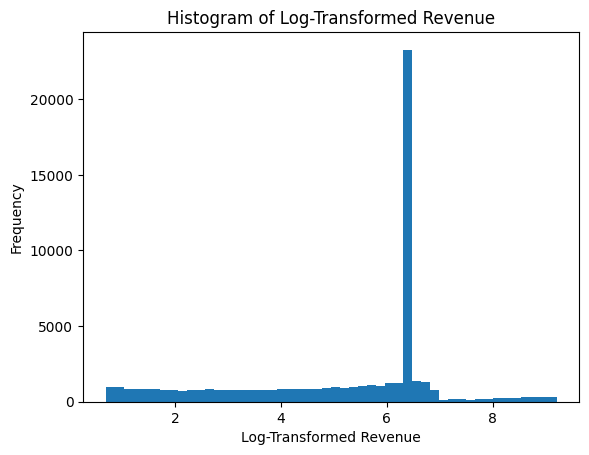

In [23]:
import matplotlib.pyplot as plt

# Plot a histogram of the log-transformed 'Revenue'
plt.hist(df['Revenue_logtransformed'], bins=50)
plt.xlabel('Log-Transformed Revenue')
plt.ylabel('Frequency')
plt.title('Histogram of Log-Transformed Revenue')
plt.show()

In [22]:
import numpy as np

# Apply log transformation to 'Revenue'. Add a small constant to handle potential zero values.
df['Revenue_logtransformed'] = np.log(df['Revenue'] + 1) # Adding 1 to handle zero values

# Display the first few rows with the new log-transformed column
display(df.head())

,Year,Mode,SCTGGroup,OrigCMA,OrigProv,OrigCtry,DestCMA,DestProv,DestCtry,Shipments,Weight,Revenue,Distance,TonneKm,Value,Revenue_normalized,Revenue_logtransformed
0,2011,TF,OTHMF,559,ON,CA,825,AB,CA,59.0,28.2842,58.5089,220.471,105.783500,560.727500,0.005752,4.086126
1,2011,TF,OTHMF,559,ON,CA,835,AB,CA,127.0,138.9191,100.2041,478.640,523.088600,612.797768,0.009922,4.617139
2,2011,TF,OTHMF,559,ON,CA,933,BC,CA,42.0,22.8506,52.9474,196.805,107.261200,612.797768,0.005196,3.988009
3,2011,TF,OTHMF,600,MB,CA,421,QC,CA,49.0,612.8821,292.8742,185.448,556.056334,612.797768,0.029193,5.683152
4,2011,TF,OTHMF,600,MB,CA,537,ON,CA,17.0,15.3625,13.9662,36.060,32.817000,299.427200,0.001297,2.705794


In [20]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Reshape the 'Revenue' column as it contains a single feature
revenue_reshaped = df['Revenue'].values.reshape(-1, 1)

# Apply Min-Max normalization
df['Revenue_normalized'] = scaler.fit_transform(revenue_reshaped)

# Display the first few rows with the new normalized column
display(df.head())

,Year,Mode,SCTGGroup,OrigCMA,OrigProv,OrigCtry,DestCMA,DestProv,DestCtry,Shipments,Weight,Revenue,Distance,TonneKm,Value,Revenue_normalized
0,2011,TF,OTHMF,559,ON,CA,825,AB,CA,59.0,28.2842,58.5089,220.471,105.783500,560.727500,0.005752
1,2011,TF,OTHMF,559,ON,CA,835,AB,CA,127.0,138.9191,100.2041,478.640,523.088600,612.797768,0.009922
2,2011,TF,OTHMF,559,ON,CA,933,BC,CA,42.0,22.8506,52.9474,196.805,107.261200,612.797768,0.005196
3,2011,TF,OTHMF,600,MB,CA,421,QC,CA,49.0,612.8821,292.8742,185.448,556.056334,612.797768,0.029193
4,2011,TF,OTHMF,600,MB,CA,537,ON,CA,17.0,15.3625,13.9662,36.060,32.817000,299.427200,0.001297


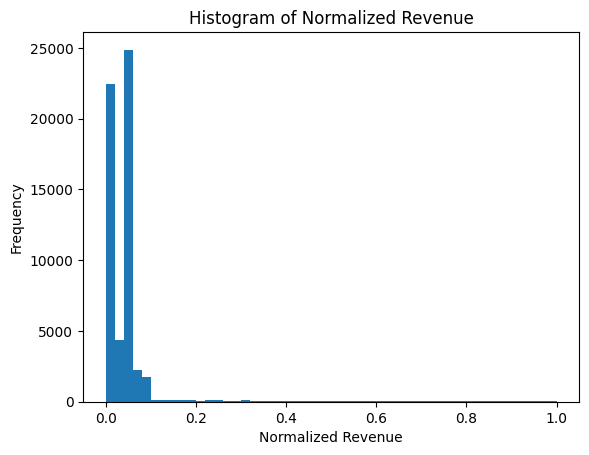

In [21]:
import matplotlib.pyplot as plt

# Plot a histogram of the normalized 'Revenue'
plt.hist(df['Revenue_normalized'], bins=50)
plt.xlabel('Normalized Revenue')
plt.ylabel('Frequency')
plt.title('Histogram of Normalized Revenue')
plt.show()

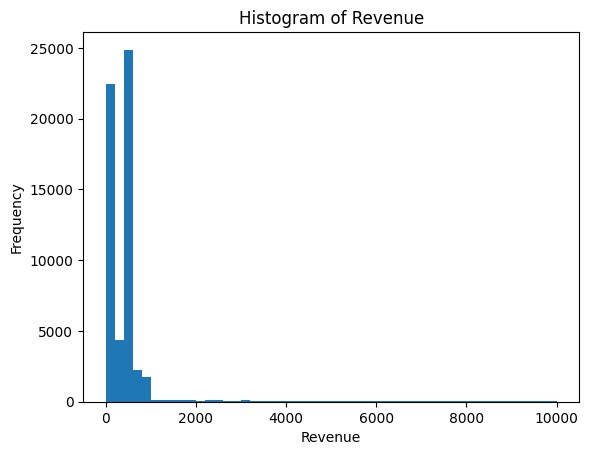

In [19]:
import matplotlib.pyplot as plt

plt.hist(df['Revenue'], bins=50)
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Histogram of Revenue')
plt.show()

In [18]:
# Perform a normality test on the 'Revenue' column
from scipy import stats

# Shapiro-Wilk test
shapiro_test = stats.shapiro(df['Revenue'])
print(f"Shapiro-Wilk test statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

# Interpretation of the Shapiro-Wilk test
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print("The data appears to be normally distributed (fail to reject H0)")
else:
    print("The data does not appear to be normally distributed (reject H0)")

Shapiro-Wilk test statistic: 0.3848721185784372, p-value: 8.50512046654213e-153
The data does not appear to be normally distributed (reject H0)


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 58721.
  res = hypotest_fun_out(*samples, **kwds)


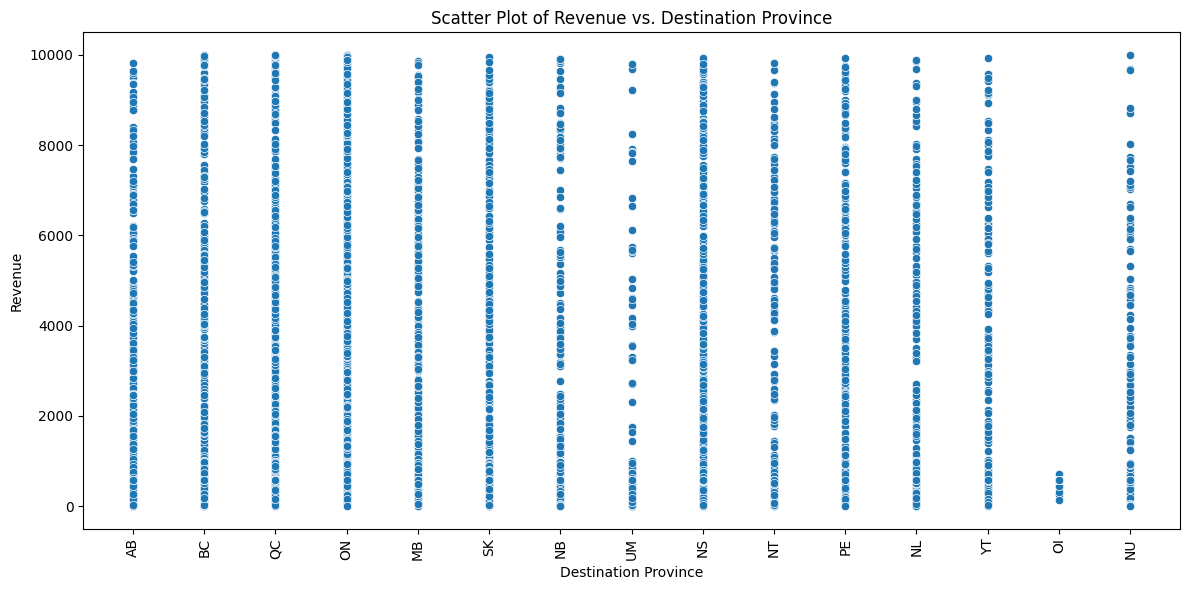

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot of 'Revenue' vs 'DestProv'
plt.figure(figsize=(12, 6)) # Adjust figure size for better readability if needed
sns.scatterplot(data=df, x='DestProv', y='Revenue')
plt.title('Scatter Plot of Revenue vs. Destination Province')
plt.xlabel('Destination Province')
plt.ylabel('Revenue')
plt.xticks(rotation=90) # Rotate x-axis labels if they overlap
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

In [33]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Define the independent and dependent variables
X = df['Value'].values.reshape(-1, 1) # Independent variable (feature) - reshape for Scikit-Learn
y = df['Revenue'].values.reshape(-1, 1) # Dependent variable (target) - reshape for Scikit-Learn

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Print the intercept and coefficient
print(f"Intercept: {model.intercept_[0]}")
print(f"Coefficient: {model.coef_[0][0]}")

Intercept: 407.00606104718815
Coefficient: 0.27690238455457167


In [32]:
# Calculate the Pearson correlation coefficient between 'Revenue' and 'Value'
pearson_corr = df['Revenue'].corr(df['Value'], method='pearson')

# Print the correlation coefficient
print(f"Pearson correlation coefficient between Revenue and Value: {pearson_corr}")

Pearson correlation coefficient between Revenue and Value: 0.21364332587523194


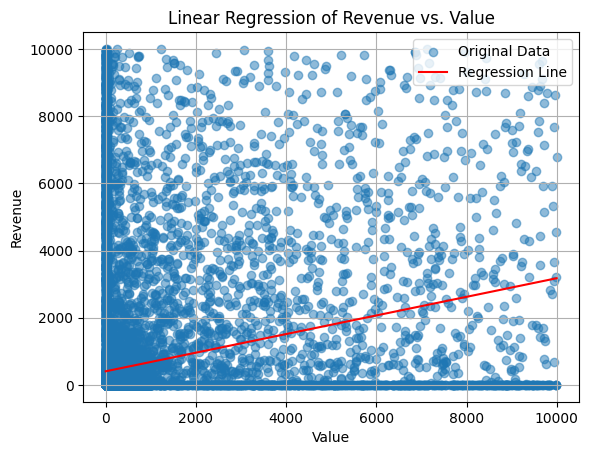

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the original data points
plt.scatter(df['Value'], df['Revenue'], label='Original Data', alpha=0.5)

# Calculate the predicted Revenue values based on the regression model
# We need the minimum and maximum 'Value' to draw the line
value_min = df['Value'].min()
value_max = df['Value'].max()
# Create an array of Value points to draw the line
value_range = np.array([value_min, value_max]).reshape(-1, 1)
# Predict the corresponding Revenue values
predicted_revenue = model.predict(value_range)


# Plot the regression line
plt.plot(value_range, predicted_revenue, color='red', label='Regression Line')

# Add titles and labels
plt.title('Linear Regression of Revenue vs. Value')
plt.xlabel('Value')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()

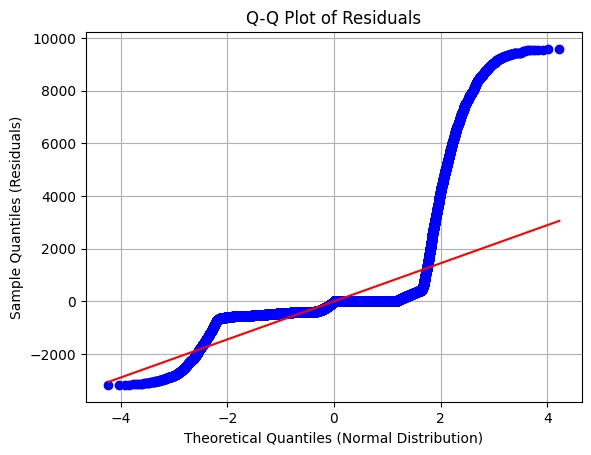

In [38]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generate a Q-Q plot of the residuals
stats.probplot(residuals.flatten(), dist="norm", plot=plt) # flatten() is used to convert the residuals array to 1D

# Add titles and labels
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles (Normal Distribution)')
plt.ylabel('Sample Quantiles (Residuals)')
plt.grid(True)
plt.show()

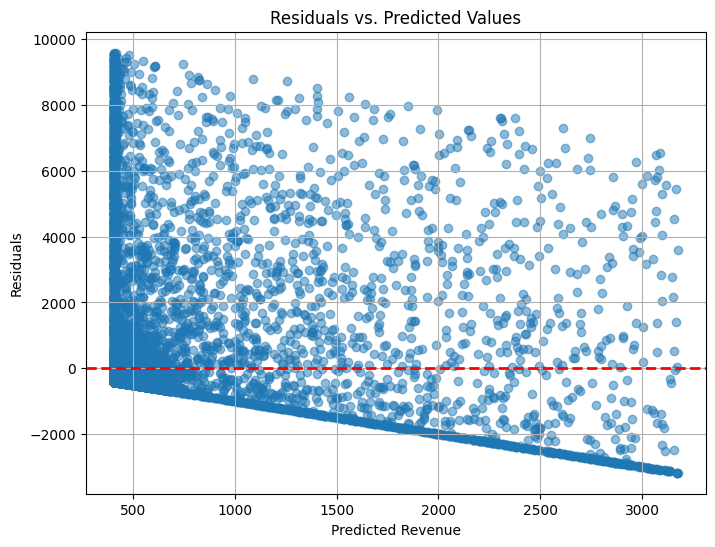

In [37]:
import matplotlib.pyplot as plt

# Plot residuals against predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2) # Add a horizontal line at y=0
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.grid(True)
plt.show()

In [35]:
# Calculate the predicted Revenue values
y_pred = model.predict(X)

# Calculate the residuals
residuals = y - y_pred

# Display the first few residuals
print("First 5 residuals:")
print(residuals[:5])

First 5 residuals:
[[-503.76394288]
 [-476.48712419]
 [-523.74382419]
 [-283.81702419]
 [-475.95196673]]


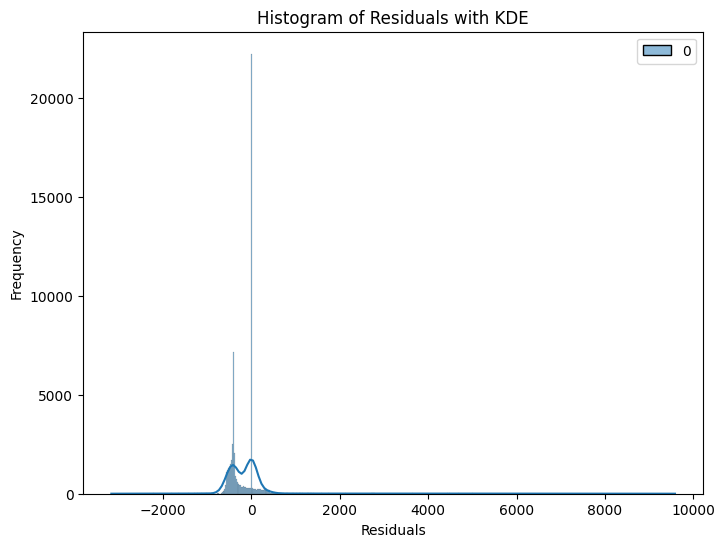

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a histogram of the residuals with KDE
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals with KDE')
plt.show()

In [39]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)ñ
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared (Coefficient of Determination)
r2 = r2_score(y, y_pred)
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 1300618.3581120018
Root Mean Squared Error (RMSE): 1140.4465608313271
R-squared (R²): 0.045643470691030696


Basado en el modelo de regresión lineal que construimos usando 'Value' para predecir 'Revenue' y la evaluación que realizamos:

*   **¿Qué tan útil consideras el modelo para hacer predicciones?**
    Dado el bajo valor de R cuadrado (aproximadamente 0.0456), este modelo de regresión lineal simple **no es muy útil** para hacer predicciones precisas de 'Revenue' basándose únicamente en 'Value'. El modelo solo explica un pequeño porcentaje de la variación en 'Revenue'.

*   **¿Cuáles son sus limitaciones?**
    Las principales limitaciones de este modelo son:
    *   **Bajo Poder Predictivo:** Como lo indica el bajo R cuadrado, 'Value' por sí solo no es un predictor fuerte de 'Revenue'.
    *   **Violación de Supuestos:** Los gráficos de residuos (histograma, residuos vs. predichos y gráfico Q-Q) sugieren que los supuestos de la regresión lineal, como la normalidad de los residuos y la homocedasticidad, pueden no cumplirse completamente. Esto puede afectar la confiabilidad de los coeficientes del modelo y la inferencia estadística.
    *   **Simplicidad:** Un modelo lineal simple asume una relación lineal entre las dos variables, lo que podría no capturar completamente la complejidad de cómo 'Revenue' está influenciado por otros factores.

*   **¿Crees que es necesario hacer un ajuste o estandarización a las variables dependientes o independientes?**
    Aplicamos estandarización (normalización Z-score) y transformaciones (Log y Box-Cox) a la columna 'Revenue' anteriormente para explorar sus distribuciones e intentar lograr la normalidad. Si bien la estandarización puede ser necesaria para ciertos algoritmos, para la regresión lineal simple, afecta principalmente la interpretación de los coeficientes, pero no el poder predictivo del modelo (R cuadrado). Las transformaciones como Log o Box-Cox *pueden* a veces mejorar el ajuste del modelo al hacer las relaciones más lineales o los residuos más normales, pero no garantizan un buen modelo si las variables en sí mismas tienen una relación débil.

    Basado en el bajo R cuadrado, simplemente ajustar o estandarizar 'Revenue' o 'Value' dentro de este modelo lineal simple **es poco probable que mejore significativamente su poder predictivo**. Para obtener un modelo más útil, probablemente sería necesario:
    *   Incluir **más variables independientes** que puedan tener una relación más fuerte con 'Revenue' (por ejemplo, 'Shipments', 'Weight', 'Distance', 'Mode', 'SCTGGroup', etc.).
    *   Considerar **diferentes tipos de modelos de regresión** que puedan capturar relaciones no lineales.

En resumen, si bien podemos construir un modelo, este modelo de regresión lineal simple específico que utiliza solo 'Value' tiene limitaciones significativas para predecir 'Revenue'.

In [40]:
# Review the available columns
print("Available columns in the DataFrame:")
print(df.columns)

# Identify potential numerical independent variables (excluding 'Revenue' and its transformations)
independent_variables = ['Shipments', 'Weight', 'Distance', 'TonneKm', 'Value']

print("\nSelected independent variables:")
print(independent_variables)

Available columns in the DataFrame:
Index(['Year', 'Mode', 'SCTGGroup', 'OrigCMA', 'OrigProv', 'OrigCtry',
       'DestCMA', 'DestProv', 'DestCtry', 'Shipments', 'Weight', 'Revenue',
       'Distance', 'TonneKm', 'Value', 'Revenue_normalized',
       'Revenue_logtransformed', 'Revenue_boxcox', 'Revenue_zscore'],
      dtype='object')

Selected independent variables:
['Shipments', 'Weight', 'Distance', 'TonneKm', 'Value']


In [41]:
from sklearn.model_selection import train_test_split

# Select the columns specified in the independent_variables list for features (X)
independent_variables = ['Shipments', 'Weight', 'Distance', 'TonneKm', 'Value']
X = df[independent_variables]

# Select the 'Revenue' column for the target variable (y)
y = df['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (46976, 5)
Shape of X_test: (11745, 5)
Shape of y_train: (46976,)
Shape of y_test: (11745,)


In [42]:
from sklearn.linear_model import LinearRegression

# Instantiate a LinearRegression model object
multiple_regression_model = LinearRegression()

# Fit the model to the training data
multiple_regression_model.fit(X_train, y_train)

print("Multiple Linear Regression model trained successfully.")

Multiple Linear Regression model trained successfully.


In [43]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Use the trained multiple linear regression model to make predictions on the test set
y_pred_multiple = multiple_regression_model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
print(f"Mean Squared Error (MSE) for Multiple Regression Model: {mse_multiple}")

# Calculate the Root Mean Squared Error (RMSE)
rmse_multiple = np.sqrt(mse_multiple)
print(f"Root Mean Squared Error (RMSE) for Multiple Regression Model: {rmse_multiple}")

# Calculate the R-squared (Coefficient of Determination)
r2_multiple = r2_score(y_test, y_pred_multiple)
print(f"R-squared (R²) for Multiple Regression Model: {r2_multiple}")

# Interpretation of the metrics
print("\nInterpretation of Evaluation Metrics:")
print(f"- MSE and RMSE indicate the average squared and root of squared difference between the actual and predicted values. Lower values indicate better model fit.")
print(f"- R-squared represents the proportion of the variance in the dependent variable ('Revenue') that is predictable from the independent variables.")
print(f"  An R-squared value of {r2_multiple:.4f} means that approximately {r2_multiple*100:.2f}% of the variance in 'Revenue' can be explained by the independent variables in this model.")

Mean Squared Error (MSE) for Multiple Regression Model: 1192451.9679779753
Root Mean Squared Error (RMSE) for Multiple Regression Model: 1091.9944908185093
R-squared (R²) for Multiple Regression Model: 0.1410289468745175

Interpretation of Evaluation Metrics:
- MSE and RMSE indicate the average squared and root of squared difference between the actual and predicted values. Lower values indicate better model fit.
- R-squared represents the proportion of the variance in the dependent variable ('Revenue') that is predictable from the independent variables.
  An R-squared value of 0.1410 means that approximately 14.10% of the variance in 'Revenue' can be explained by the independent variables in this model.


In [44]:
# Retrieve the intercept
intercept = multiple_regression_model.intercept_

# Retrieve the coefficients
coefficients = multiple_regression_model.coef_

# Get the names of the independent variables
independent_variables = X_train.columns

# Print the intercept
print(f"Intercept: {intercept}")

# Print the coefficients with their corresponding variable names
print("\nCoefficients:")
for i, var in enumerate(independent_variables):
    print(f"{var}: {coefficients[i]}")

# Provide interpretation
print("\nInterpretation of Coefficients:")
print(f"- The Intercept ({intercept:.2f}) represents the predicted 'Revenue' when all independent variables are zero. In this context, it might not have a meaningful real-world interpretation as having zero shipments, weight, distance, tonne-km, and value is unlikely or outside the scope of the data.")
print("\nInterpretation for each independent variable:")
for i, var in enumerate(independent_variables):
    print(f"- {var}: A one-unit increase in '{var}', while holding all other independent variables constant, is associated with an estimated change of {coefficients[i]:.4f} in 'Revenue'.")

Intercept: 239.6536970455482

Coefficients:
Shipments: -0.01540889190353554
Weight: 0.2868050963222523
Distance: -0.17785116538480875
TonneKm: 0.15405472206836812
Value: 0.15825079014078364

Interpretation of Coefficients:
- The Intercept (239.65) represents the predicted 'Revenue' when all independent variables are zero. In this context, it might not have a meaningful real-world interpretation as having zero shipments, weight, distance, tonne-km, and value is unlikely or outside the scope of the data.

Interpretation for each independent variable:
- Shipments: A one-unit increase in 'Shipments', while holding all other independent variables constant, is associated with an estimated change of -0.0154 in 'Revenue'.
- Weight: A one-unit increase in 'Weight', while holding all other independent variables constant, is associated with an estimated change of 0.2868 in 'Revenue'.
- Distance: A one-unit increase in 'Distance', while holding all other independent variables constant, is associat

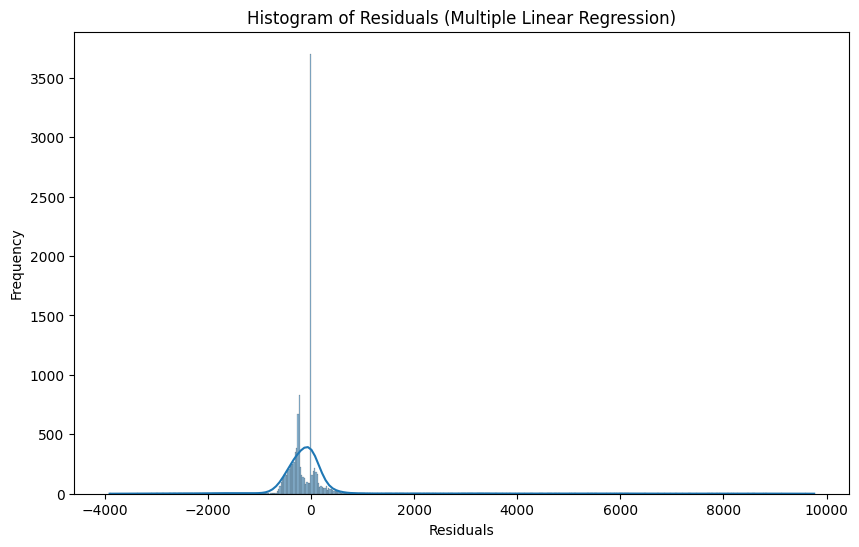

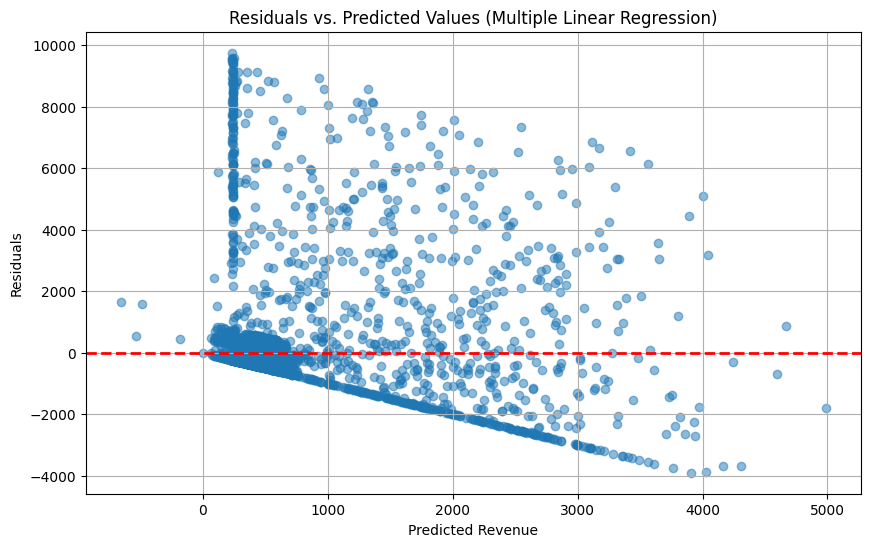

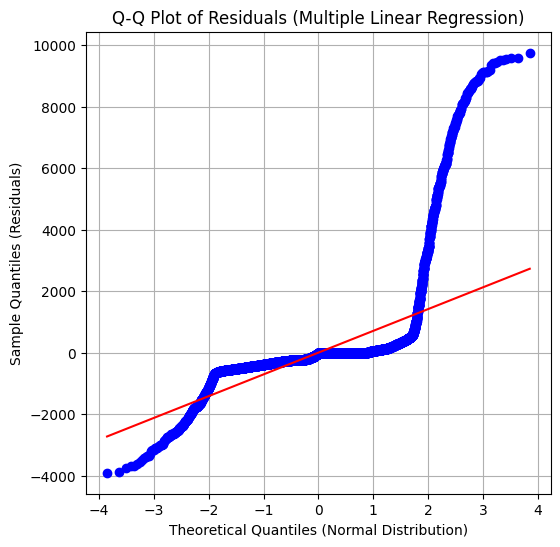

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Calculate the predicted Revenue values using the trained multiple regression model and the testing features
y_pred_multiple = multiple_regression_model.predict(X_test)

# Calculate the residuals by subtracting the predicted values from the actual values
residuals_multiple = y_test - y_pred_multiple

# Create a histogram of the residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals_multiple, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals (Multiple Linear Regression)')
plt.show()

# Create a scatter plot of the residuals against the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_multiple, residuals_multiple, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2) # Add a horizontal line at y=0
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values (Multiple Linear Regression)')
plt.grid(True)
plt.show()

# Generate a Q-Q plot of the residuals
plt.figure(figsize=(6, 6))
stats.probplot(residuals_multiple, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals (Multiple Linear Regression)')
plt.xlabel('Theoretical Quantiles (Normal Distribution)')
plt.ylabel('Sample Quantiles (Residuals)')
plt.grid(True)
plt.show()

Basado en el modelo de regresión lineal múltiple que construimos usando 'Shipments', 'Weight', 'Distance', 'TonneKm', y 'Value' para predecir 'Revenue' y la evaluación que realizamos:

*   **¿Qué tan útil consideras el modelo para hacer predicciones?**
    Dado el valor de R cuadrado (aproximadamente 0.1410), este modelo de regresión lineal múltiple es **un poco más útil** que el modelo de regresión lineal simple anterior, pero aún **no es muy fuerte** para hacer predicciones precisas de 'Revenue'. El modelo explica aproximadamente el 14.10% de la variación en 'Revenue'. Esto significa que hay otros factores importantes que influyen en 'Revenue' que no están incluidos en este modelo.

*   **¿Cuáles son sus limitaciones?**
    Las principales limitaciones de este modelo son:
    *   **Poder Predictivo Moderado:** Aunque mejor que el modelo simple, el R cuadrado de 0.1410 indica que una gran parte de la variabilidad en 'Revenue' aún no se explica por las variables incluidas.
    *   **Posible Violación de Supuestos:** Aunque no hemos realizado un análisis exhaustivo de los residuos para el modelo múltiple, es probable que algunos supuestos de la regresión lineal (como la normalidad de los residuos y la homocedasticidad) aún no se cumplan completamente, similar al modelo simple. Esto puede afectar la confiabilidad de los coeficientes.
    *   **Variables Faltantes:** Es probable que haya otras variables en el conjunto de datos (o externas a él) que tengan una relación más fuerte con 'Revenue' y que no se incluyeron en este modelo.

*   **¿Crees que es necesario hacer un ajuste o estandarización a las variables dependientes o independientes?**
    Para este modelo de regresión lineal múltiple, la estandarización (como la normalización Z-score) de las variables independientes ('Shipments', 'Weight', 'Distance', 'TonneKm', 'Value') **podría ser útil para interpretar la magnitud relativa de los coeficientes**. Cuando las variables independientes están en diferentes escalas, comparar sus coeficientes directamente puede ser engañoso. Estandarizarlas pone todos los coeficientes en una escala comparable, mostrando cuánto cambia 'Revenue' por cada desviación estándar en cada variable independiente.

    Aplicar transformaciones (como Log o Box-Cox) a 'Revenue' o a algunas de las variables independientes **podría potencialmente mejorar el ajuste del modelo** si ayuda a linealizar las relaciones entre las variables o a cumplir mejor los supuestos del modelo.

    En resumen, si bien el modelo múltiple es una mejora, su poder predictivo es limitado. Considerar la **estandarización** de las variables independientes para una mejor interpretación de los coeficientes y explorar **transformaciones** o la inclusión de **otras variables relevantes** serían los siguientes pasos lógicos para intentar mejorar el modelo.

In [46]:
# Identify numerical columns (excluding the original, transformed, and normalized Revenue columns)
numerical_cols_for_eda = ['Shipments', 'Weight', 'Distance', 'TonneKm', 'Value']

# Calculate measures of central tendency and dispersion
print("Measures of Central Tendency and Dispersion for Numerical Columns:")
display(df[numerical_cols_for_eda].describe())

Measures of Central Tendency and Dispersion for Numerical Columns:


,Shipments,Weight,Distance,TonneKm,Value
count,58721.000000,58721.000000,58721.000000,58721.000000,58721.000000
mean,571.605345,694.571157,206.610100,556.056334,612.797768
std,1582.088708,1070.549903,251.044132,907.491444,900.711998
min,1.000000,1.000000,1.000000,0.000000,0.000000
25%,3.753000,192.537000,42.260000,223.935000,343.030000
50%,19.115100,694.571157,206.610100,556.056334,612.797768
75%,226.000000,694.571157,206.610100,556.056334,612.797768
max,9996.000000,9997.000000,9943.000000,9988.000000,9997.000000


Histograms for Numerical Columns:


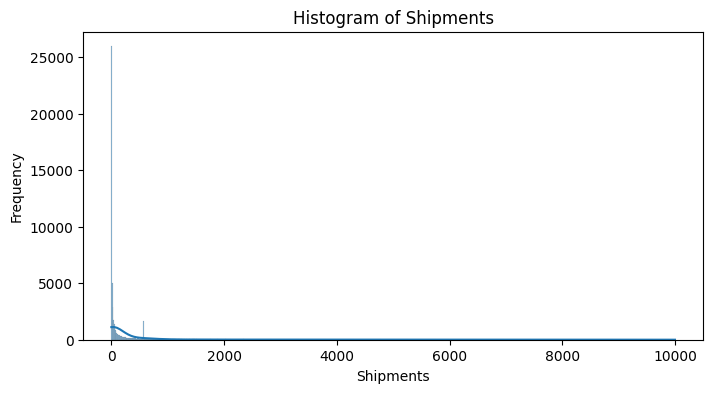

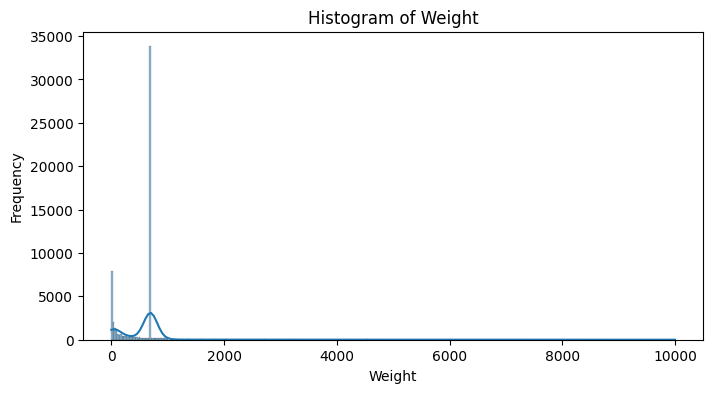

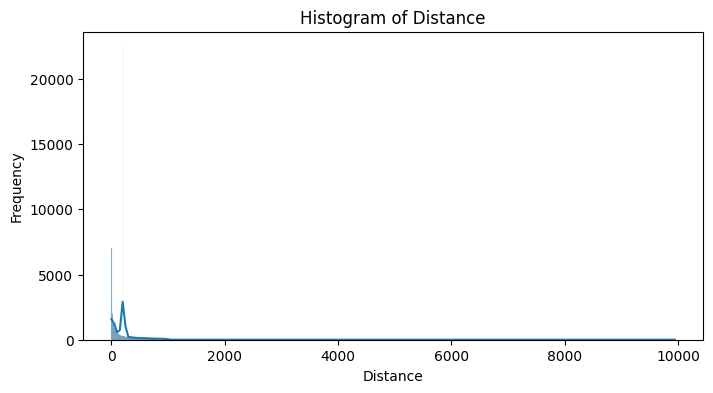

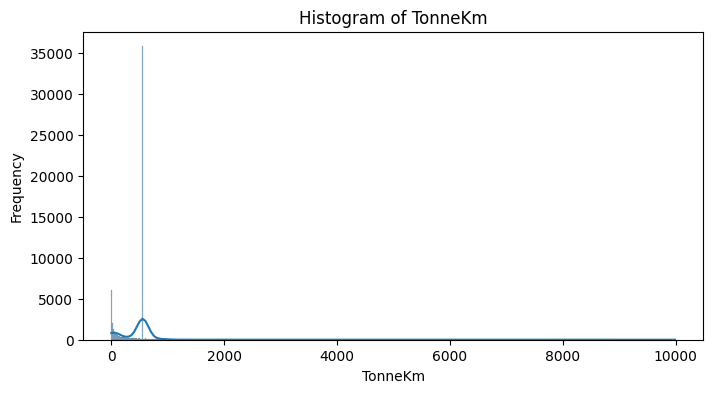

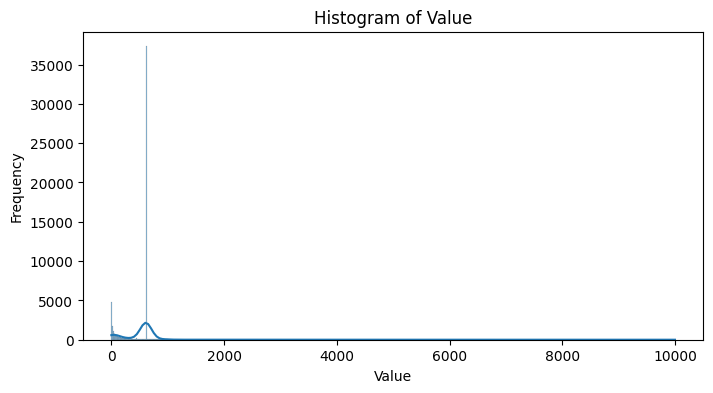

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols_for_eda = ['Shipments', 'Weight', 'Distance', 'TonneKm', 'Value']

# Generate histograms for numerical columns
print("Histograms for Numerical Columns:")
for col in numerical_cols_for_eda:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


Boxplots for Numerical Columns:


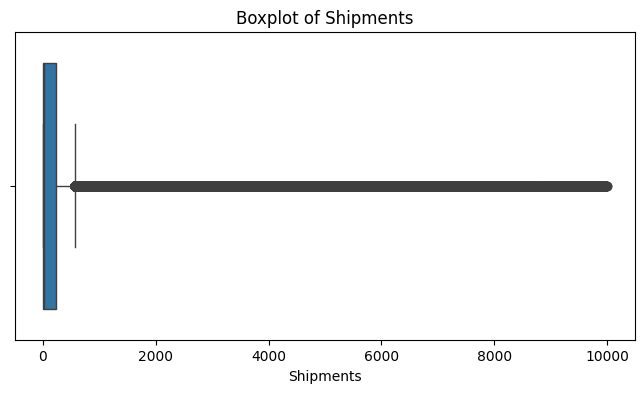

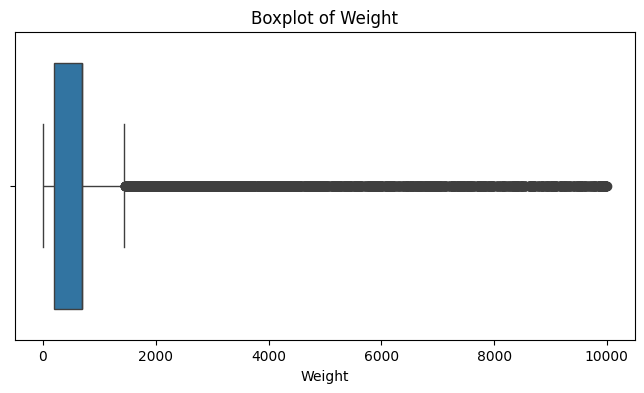

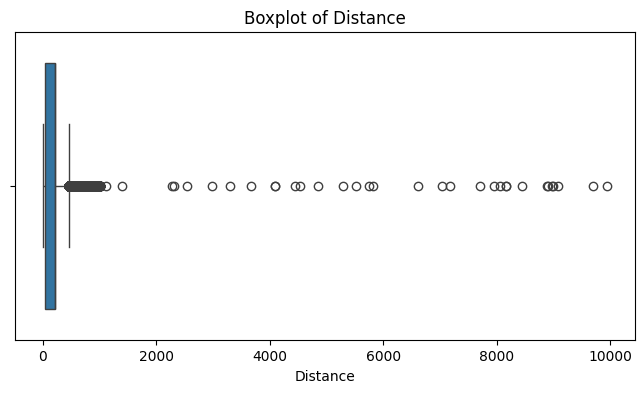

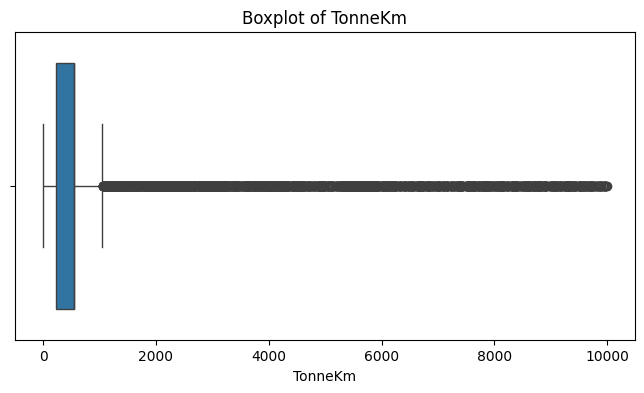

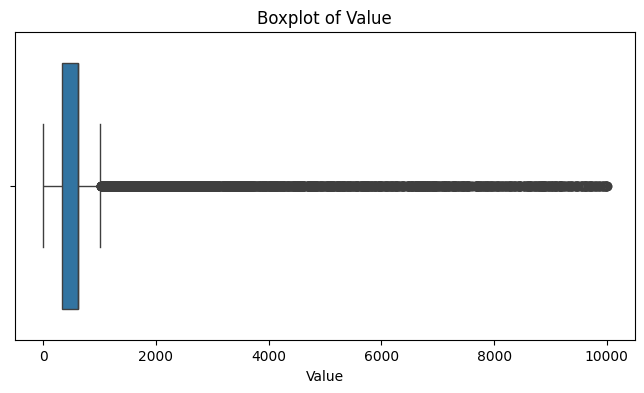

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols_for_eda = ['Shipments', 'Weight', 'Distance', 'TonneKm', 'Value']

# Generate boxplots for numerical columns
print("\nBoxplots for Numerical Columns:")
for col in numerical_cols_for_eda:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

Categorical columns:
Index(['Mode', 'SCTGGroup', 'OrigProv', 'OrigCtry', 'DestProv', 'DestCtry'], dtype='object')

Bar plots for Categorical Columns:


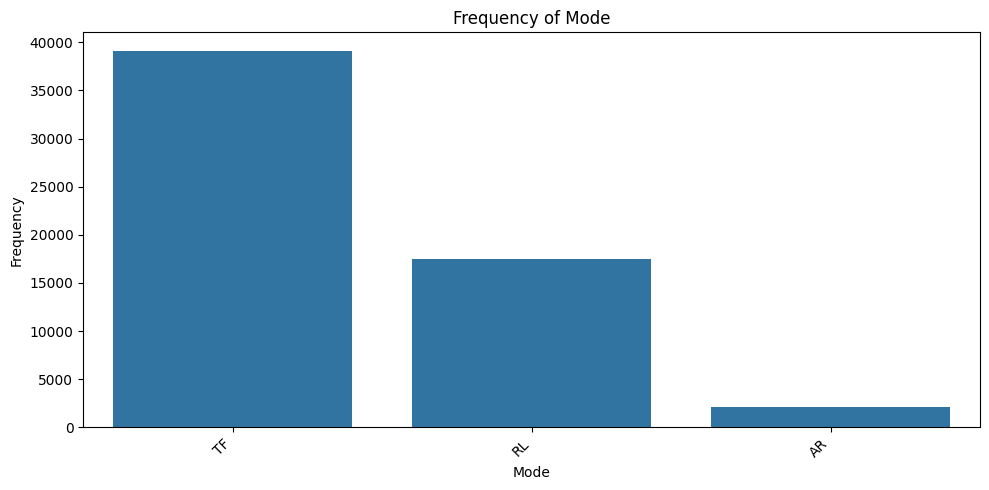

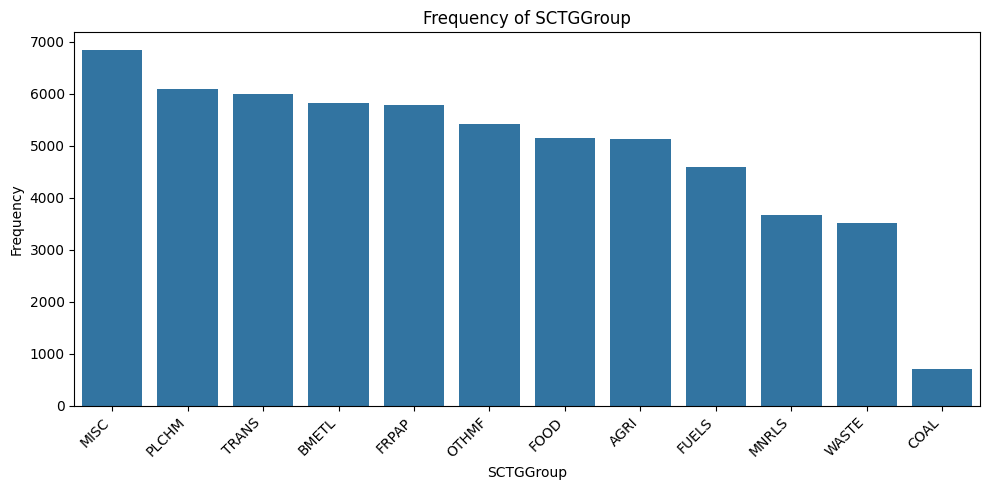

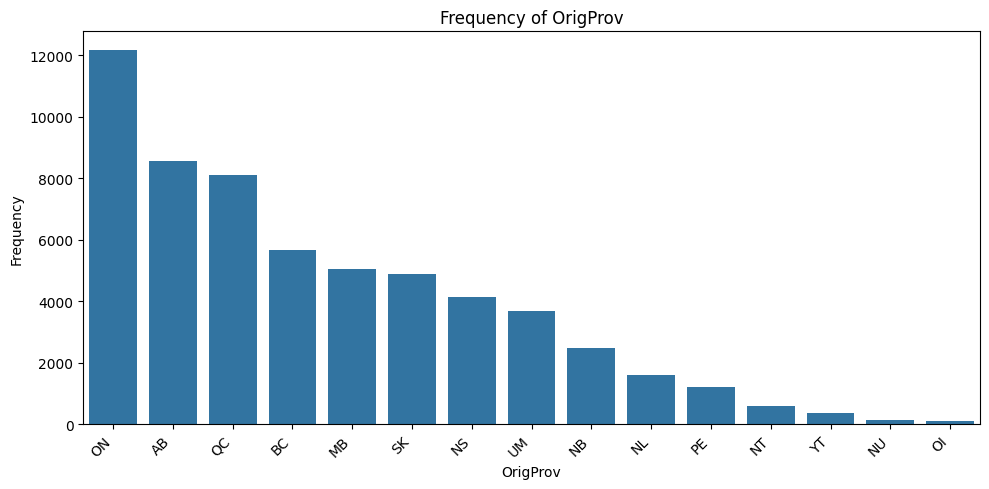

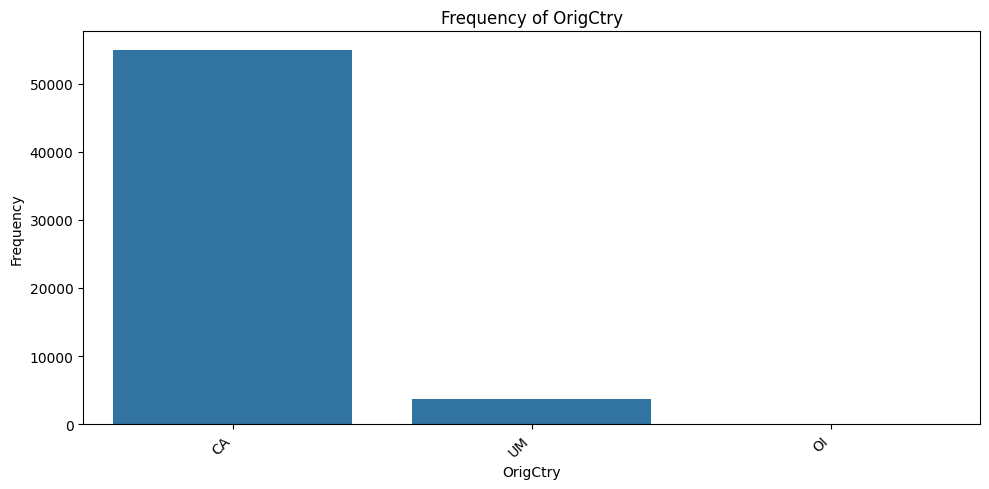

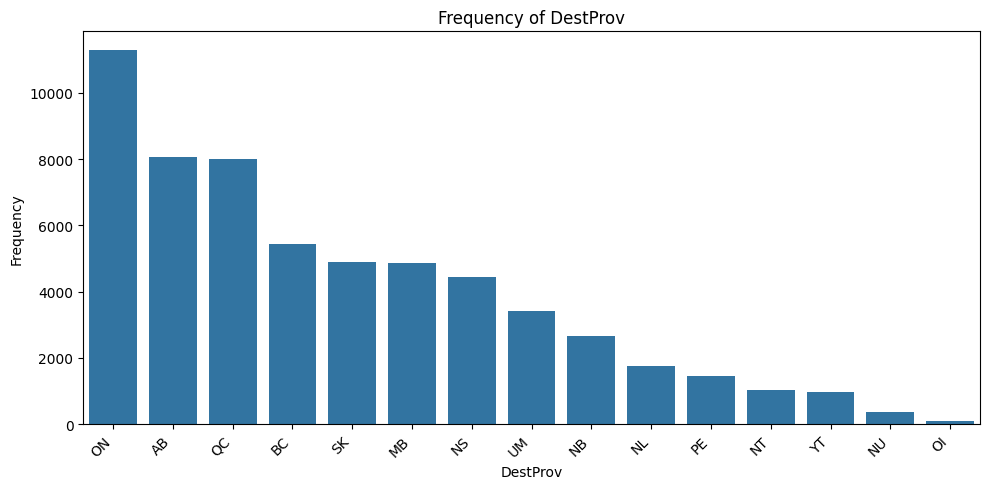

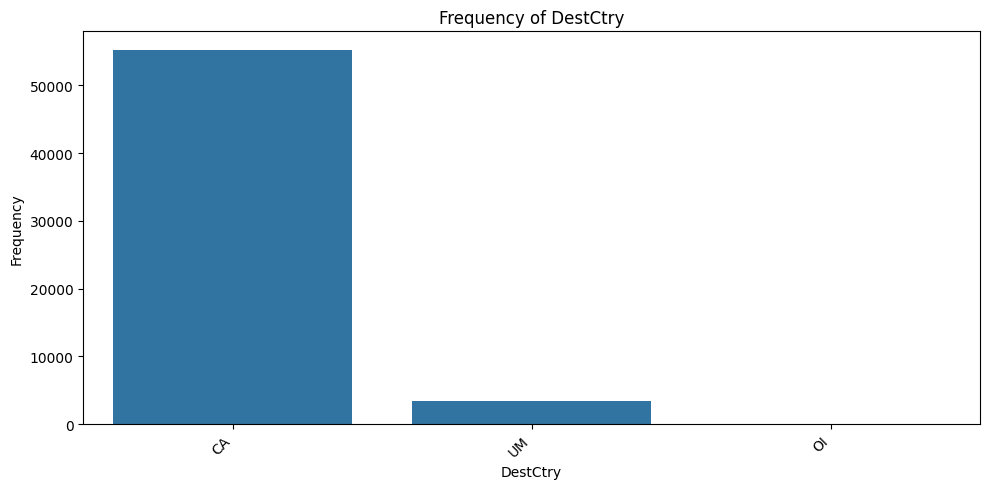

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify categorical columns (excluding numerical columns and their transformations)
categorical_cols = df.select_dtypes(include='object').columns

print("Categorical columns:")
print(categorical_cols)

# Generate bar plots for categorical columns
print("\nBar plots for Categorical Columns:")
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index) # Order by frequency
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
    plt.tight_layout() # Adjust layout to prevent labels from being cut off
    plt.show()

In [50]:
# Identify numerical columns for correlation analysis (excluding transformed/normalized Revenue columns)
numerical_cols_for_corr = ['Shipments', 'Weight', 'Revenue', 'Distance', 'TonneKm', 'Value']

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols_for_corr].corr(method='pearson')

# Print the correlation matrix
print("Correlation Matrix (Pearson):")
display(correlation_matrix)

Correlation Matrix (Pearson):


,Shipments,Weight,Revenue,Distance,TonneKm,Value
Shipments,1.000000,-0.024681,-0.037534,0.199899,-0.010252,-0.007232
Weight,-0.024681,1.000000,0.316820,-0.053154,0.196823,0.221543
Revenue,-0.037534,0.316820,1.000000,-0.060698,0.197769,0.213643
Distance,0.199899,-0.053154,-0.060698,1.000000,-0.019032,-0.026984
TonneKm,-0.010252,0.196823,0.197769,-0.019032,1.000000,0.222024
Value,-0.007232,0.221543,0.213643,-0.026984,0.222024,1.000000


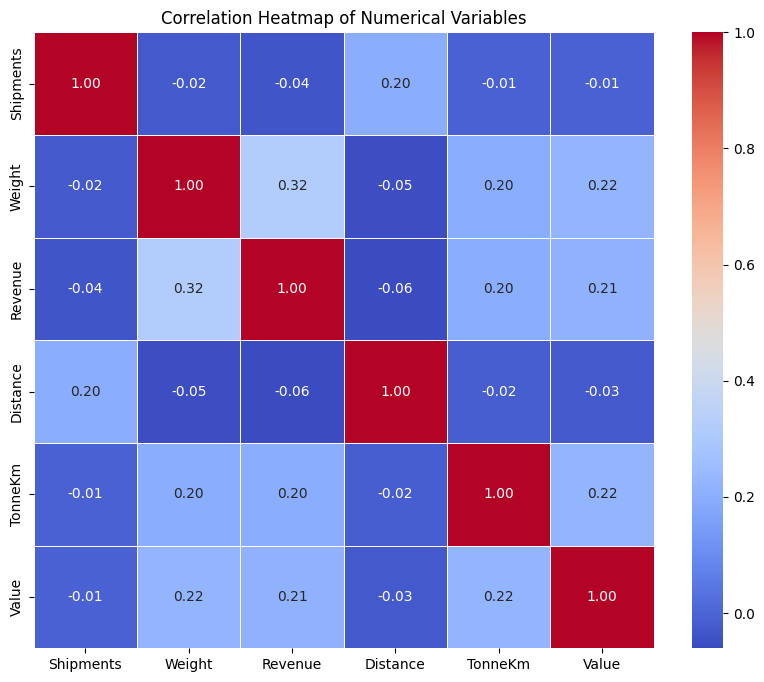

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [52]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the independent variables (features) and the dependent variable (target)
independent_variables = ['Shipments', 'Weight', 'Distance', 'TonneKm', 'Value']
X = df[independent_variables]
y = df['Revenue']

# Split the data into training and testing sets (if not already done)
# Assuming you want to use the same split as before, but regenerating for clarity
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# --- Lasso Regression ---
print("--- Lasso Regression ---")
# Initialize and fit the Lasso model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Calculate evaluation metrics for Lasso
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso - Mean Squared Error (MSE): {mse_lasso}")
print(f"Lasso - Root Mean Squared Error (RMSE): {rmse_lasso}")
print(f"Lasso - R-squared (R²): {r2_lasso}")

# --- Ridge Regression ---
print("\n--- Ridge Regression ---")
# Initialize and fit the Ridge model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Calculate evaluation metrics for Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge - Mean Squared Error (MSE): {mse_ridge}")
print(f"Ridge - Root Mean Squared Error (RMSE): {rmse_ridge}")
print(f"Ridge - R-squared (R²): {r2_ridge}")

--- Lasso Regression ---
Lasso - Mean Squared Error (MSE): 1192451.9657138754
Lasso - Root Mean Squared Error (RMSE): 1091.9944897818282
Lasso - R-squared (R²): 0.14102894850543957

--- Ridge Regression ---
Ridge - Mean Squared Error (MSE): 1192451.9679778547
Ridge - Root Mean Squared Error (RMSE): 1091.994490818454
Ridge - R-squared (R²): 0.14102894687460443
